In [1]:
import numpy as np
from skimage.io import imread, imshow
from napari_simpleitk_image_processing import threshold_otsu, median_filter, gaussian_blur, signed_maurer_distance_map

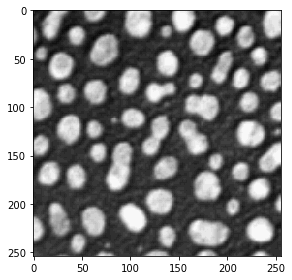

In [2]:
blobs = imread('https://samples.fiji.sc/blobs.png')
imshow(blobs)

## Median filter

Computing result took 0.008002281188964844


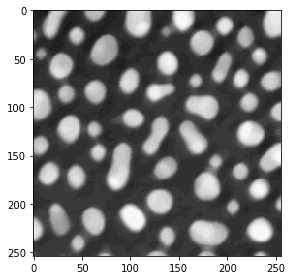

In [4]:
imshow(median_filter(blobs, 5, 5, 0))

# Gaussian blur

Computing result took 0.011002779006958008


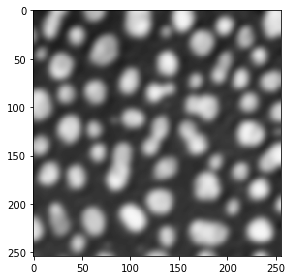

In [6]:
imshow(gaussian_blur(blobs, 10, 10, 0))

## Threshold Otsu

Computing result took 0.006002187728881836


C:\Users\rober\miniconda3\envs\bio_38\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


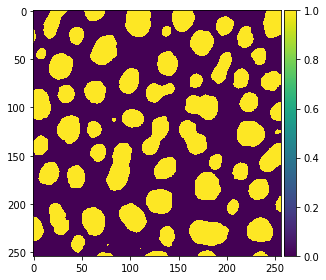

In [7]:
binary = threshold_otsu(blobs)
imshow(binary)

## Distance Map

Computing result took 0.014003992080688477


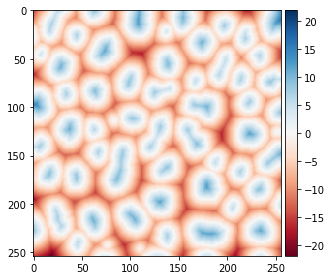

In [8]:
distance_image = signed_maurer_distance_map(binary)
imshow(distance_image)

## Morphological Watershed

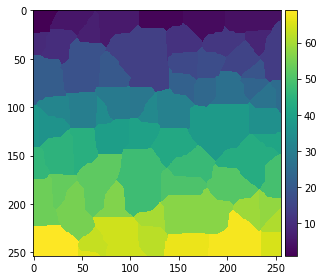

In [81]:
imshow(morphological_watershed(distance_image))


## Connected component labeling

In [169]:
imshow(connected_component_labeling(binary))

AttributeError: 'Image' object has no attribute 'dtype'

## Touching objects labeling

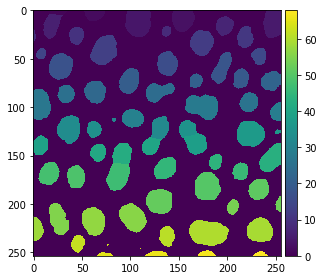

In [113]:


imshow(label_touching_objects(binary))


## Watershed-Otsu-Labeling

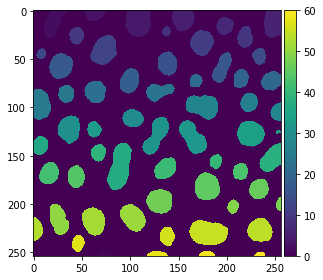

In [157]:


imshow(sitk.GetArrayFromImage(watershed_otsu_labeling(itk_blobs)))

### Segment images showing membranes

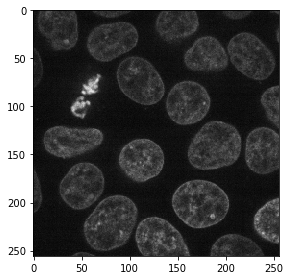

In [162]:
from skimage.data import cells3d

cells = cells3d()

nuclei = cells[30, 1]
imshow(nuclei)

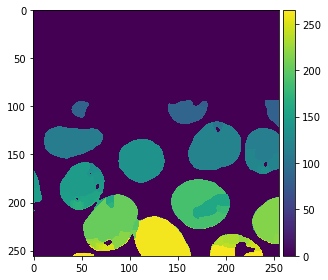

In [165]:
itk_nuclei = sitk.GetImageFromArray(nuclei)

segmented_nuclei = watershed_otsu_labeling(itk_nuclei, spot_sigma=1, watershed_level=10)
imshow(sitk.GetArrayFromImage(approximate_voronoi_otsu_labeling(segmented_nuclei)))

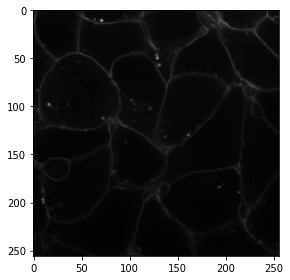

In [116]:
membranes = cells[30, 0]
imshow(membranes)

Low image data range; displaying image with stretched contrast.


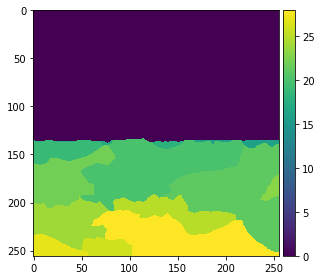

In [166]:
itk_membranes = sitk.GetImageFromArray(membranes)

segmented_cells = morphological_watershed(itk_membranes)

imshow(sitk.GetArrayFromImage(approximate_voronoi_otsu_labeling(segmented_cells)))

In [167]:
type(itk_blobs)

SimpleITK.SimpleITK.Image